# Universidad Nacional de Colombia
## Mineria de Datos
### Clase 2: Principal Component Analysis
### Alejandro Cano 


## Análisis de componentes principales

Este caso práctico muestra un ejemplo de cómo hacer un análisis de componentes principales en R La meta del caso es conocer una de las funciones más usadas en R para hacer análisis de componentes principales. Entender las salidas que ofrece y tomar decisiones de análisis basadas en ellas.

**Contexto:** El sector de los bienes raíces es uno de los más exitosos en la economía del mundo. La gran mayoría de personas en el mundo deciden rentar sus viviendas por comodidad o economía.

**Problema de negocio:** Existen relaciones fuertes entre las variables a considerar cuando se busca un inmueble para rentarlo? Si es así cómo podría resumir esta información para lograr encontrar un lugar de renta

Empezaremos por cargar las librerías requeridas para este caso

In [ ]:
# plantear hipotesis

# top 3 de variables que determinan el precio de inmueble

# Ubicacion
# Area
# # habitacion
# mt2
# Antiguedad
# 3 banos
# cantidad de pisos
# garaje
# estrato

In [3]:
import pandas as cualquiercosa
import numpy as np

import seaborn as sns # 1. 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Datos
Vamos a utilizar una tabla de datos que contiene información sobre los inmuebles en renta y sus características en el mercado de Brasil. La documentación de los mismos puede encontrarse en https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv Así pues, para cada inmueble se tiene la siguiente información: 
- city: ciudad donde la propiedad esta ubicada 
- area: area de la propiedad 
- rooms: número de cuartos 
- bathroom: número de baños 
- parking spaces: número de parqueaderos 
- floor: piso - animal : acepta animales 
- furnished: esta amoblada 
- hoa: administración 
- rent amount: renta 
- property tax: impuesto predial 
- fire insurance: seguro de incendio 
- total: valor total

In [4]:
data = cualquiercosa.read_csv('../Datos/houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [12]:
data['total_validacion'] = data['hoa']+data['rent']+data['property_tax']+data['fire_insurance']

In [13]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent,property_tax,fire_insurance,total,total_validacion
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,19264
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,14019


## Pre-procesamiento y limpieza
Debemos modificar la variable floor ya que sería interesante incluirla como un valor numérico. Sin embargo el tipo de variable es un factor y contiene el valor ‘-’ para referirse al ground floor.

In [9]:
# numero de campos vacios por variable
# data.isnull().sum()
data.describe()

,area,rooms,bathroom,parking spaces,hoa,rent,property_tax,fire_insurance,total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              10692 non-null  object
 1   area              10692 non-null  int64 
 2   rooms             10692 non-null  int64 
 3   bathroom          10692 non-null  int64 
 4   parking spaces    10692 non-null  int64 
 5   floor             10692 non-null  object
 6   animal            10692 non-null  object
 7   furniture         10692 non-null  object
 8   hoa               10692 non-null  int64 
 9   rent              10692 non-null  int64 
 10  property_tax      10692 non-null  int64 
 11  fire_insurance    10692 non-null  int64 
 12  total             10692 non-null  int64 
 13  total_validacion  10692 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 1.1+ MB


In [14]:
data['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [16]:
data.loc[data['floor']=='-','floor'] = 0

In [18]:
data['floor'] = data['floor'].astype(int)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              10692 non-null  object
 1   area              10692 non-null  int64 
 2   rooms             10692 non-null  int64 
 3   bathroom          10692 non-null  int64 
 4   parking spaces    10692 non-null  int64 
 5   floor             10692 non-null  int64 
 6   animal            10692 non-null  object
 7   furniture         10692 non-null  object
 8   hoa               10692 non-null  int64 
 9   rent              10692 non-null  int64 
 10  property_tax      10692 non-null  int64 
 11  fire_insurance    10692 non-null  int64 
 12  total             10692 non-null  int64 
 13  total_validacion  10692 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [24]:
print(data['animal'].unique())
print(data['furniture'].unique())

[1 0]
['furnished' 'not furnished']


In [22]:
data['animal'] = np.where(data['animal']=='acept',1,0)

In [25]:
data['furniture'] = np.where(data['furniture']=='furnished',1,0)

In [29]:
# voy a hacer el conteo de cuantaas observaciones hay por ciudad
ciudades = data['city'].value_counts().reset_index()
ciudades

,index,city
0,São Paulo,5887
1,Rio de Janeiro,1501
2,Belo Horizonte,1258
3,Porto Alegre,1193
4,Campinas,853


Queremos hacer un análisis por componentes principales en datos sobre inmuebles rentados. Para acotar nuestro análisis filtraremos únicamente los registros de Sao Paulo. Adicionalmente, para ésta técnica únicamente requerimos de las variables numéricas, por lo cual excluimos del análisis las variables **animal** y **furnished**

In [30]:
data_acp = data[data['city']=='São Paulo']
data_acp = data_acp[['area','rooms','bathroom','parking spaces','floor','hoa','rent','property_tax','fire_insurance','total']]

## Exploración
Empecemos haciendo una exploración de los datos

In [31]:
data_acp.describe()

,area,rooms,bathroom,parking spaces,floor,hoa,rent,property_tax,fire_insurance,total
count,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000,5887.000000
mean,158.899439,2.558859,2.467641,1.877527,5.626465,1169.627994,4652.793783,495.701716,62.428911,6380.831833
std,347.474169,1.166365,1.503060,1.687973,6.056361,4076.461180,3634.612007,4153.618928,50.073429,7541.320897
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,500.000000,0.000000,4.000000,508.000000
25%,59.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2000.000000,37.000000,26.000000,2631.000000
50%,106.000000,3.000000,2.000000,1.000000,4.000000,665.000000,3400.000000,170.000000,45.000000,4596.000000
75%,212.000000,3.000000,4.000000,3.000000,9.000000,1608.500000,6000.000000,550.000000,83.000000,8591.000000
max,24606.000000,10.000000,10.000000,12.000000,46.000000,220000.000000,45000.000000,313700.000000,677.000000,316900.000000


Podemos revisar la correlación entre las variables numéricas

<AxesSubplot: >

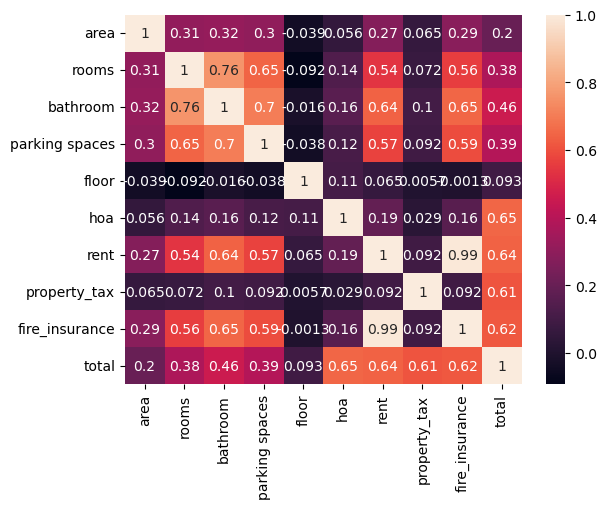

In [32]:
sns.heatmap(data_acp.corr(),annot = True)

De lo anterior ya podemos entender el funcionamiento de los datos. Aquí podemos tomar la decisión de sacar información que se vuelve redundante. En particular, la variable total resulta ser la suma de hoa, rent,property_tax y fire_insurance. Podemos observar la relación lineal casi perfecta entre el costo total y el seguro contra incendios, probablemente se calcula de acuerdo al canon de arrendamiento. En este punto podemos quedarnos únicamente con las variables hoa y rent las cuales contienen suficiente información para entender los costos.

In [33]:
data_acp = data_acp[['area','rooms','bathroom','parking spaces','floor','hoa','rent']]

El análisis de componentes principales es sensible a las dimensiones. Es recomendable siempre hacer una estandarización de las variables a utilizar para que las unidades de análisis no interfieran en el análisis. La idea es llevar todas las variables a la misma escala, así esta no interfiere con los resultados del análisis. Esto lo podemos hacer transformando a las variables para que tengan media cero y varianza 1. Hagamos la estandarización del valor de la renta:

In [34]:
# calculamos la media de la variable
media_renta = data_acp['rent'].mean()
# Calculamos la desviación estándar
ds_renta = data_acp['rent'].std()
# a cada valor restamos la media y dividimos por la desviación estándar
data_acp['renta_std1'] = (data_acp['rent']-media_renta)/(ds_renta)
# Revisemos el resultado
data_acp[['rent','renta_std1']].head()


,rent,renta_std1
0,3300,-0.372198
1,4960,0.084522
4,800,-1.060029
5,8000,0.920925
7,3223,-0.393383


In [ ]:
data_acp[['rent','renta_std1']].describe()

Existe también en Python tenemos una función **StandardScaler** que hace éste cómputo por nosotros

In [35]:
# creamos el objeto scaler
scaler = StandardScaler()

In [36]:
# ajustamos y transformamos los datos
data_acp['renta_std2'] = scaler.fit_transform(data_acp[['rent']]) 

In [37]:
data_acp[['rent','renta_std1','renta_std2']].head()

,rent,renta_std1,renta_std2
0,3300,-0.372198,-0.372229
1,4960,0.084522,0.084530
4,800,-1.060029,-1.060119
5,8000,0.920925,0.921004
7,3223,-0.393383,-0.393416


In [38]:
data_acp[['rent','renta_std1','renta_std2']].describe()

,rent,renta_std1,renta_std2
count,5887.000000,5.887000e+03,5.887000e+03
mean,4652.793783,6.638330e-18,1.327666e-17
std,3634.612007,1.000000e+00,1.000085e+00
min,500.000000,-1.142569e+00,-1.142666e+00
25%,2000.000000,-7.298699e-01,-7.299319e-01
50%,3400.000000,-3.446843e-01,-3.447136e-01
75%,6000.000000,3.706603e-01,3.706917e-01
max,45000.000000,1.110083e+01,1.110177e+01


Eliminamos estas dos columnas creadas

In [39]:
data_acp = data_acp[['area','rooms','bathroom','parking spaces','floor','hoa','rent']]

### Análisis de componentes principales

La gran mayoría de implementaciones en R o Python de ACP tienen la posibilidad de estandarizar las variables dentro de la función. En este caso utilizaremos la función PCA de la librería sklearn

In [40]:
data_scale =  scaler.fit_transform(data_acp[['area','rooms','bathroom','parking spaces','floor','hoa','rent']])

In [50]:
pca = PCA(n_components=7)

In [51]:
pca_renta = pca.fit(data_scale)
pca_renta = pca.transform(data_scale)

Y podemos describir entonces cómo está hecha la combinación lineal de cada variable original para definir los componentes principales

In [52]:
pca.components_[0]

array([ 0.26990385,  0.47990926,  0.50658877,  0.47351131, -0.01713239,
        0.13939036,  0.44302447])

Por ejemplo, la primer componente se puede definir así:

$CP1=0.26area+0.47rooms+0.50bathroom+0.47parking−0.017floor+0.13hoa+0.44rent$

Estos pesos de cada variable en el primer componente nos dan una idea de qué información está recogiendo la dimensión.

Podemos también revisar cómo está representada cada observación en las nuevas dimensiones

In [44]:
pca_renta

array([[-1.17807728,  0.39516671,  0.15327496, ...,  0.08333174,
         0.05963683, -0.39344327],
       [ 0.70576695,  1.67206985, -1.48212561, ..., -0.90958463,
        -1.79468767,  0.20896591],
       [-2.26346527, -0.60538681,  0.47691821, ...,  0.18317251,
         0.07943144,  0.32378539],
       ...,
       [ 1.42018195,  0.40449096, -0.65825729, ...,  1.77086492,
        -0.57579043, -0.34997881],
       [ 3.09810148,  1.81127292, -1.1821651 , ...,  1.13098421,
        -0.19174994, -0.59891159],
       [-1.73327814, -0.82644701,  0.56495353, ..., -0.02743525,
        -0.36150915, -0.16435462]])

In [53]:
import pandas as pd
principalDf = pd.DataFrame(data = pca_renta, columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7'])
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.178077,0.395167,0.153275,0.156273,0.083332,0.059637,-0.393443
1,0.705767,1.672070,-1.482126,0.277543,-0.909585,-1.794688,0.208966
2,-2.263465,-0.605387,0.476918,0.232387,0.183173,0.079431,0.323785
3,2.350645,-1.090601,-0.019287,-0.176669,0.279211,2.141313,-0.503966
4,1.614392,-0.354922,0.290256,-0.306513,-1.208284,0.314209,0.025293


Paso seguido podemos visualizar los valores propios para saber qué tan buena es la reducción en los componentes principales. Utilizaremos **explained_variance_** para obtener los valores propios o varianza explicada y **explained_variance_ratio_** para saber el porcentaje de varianza explicada por cada componente

In [54]:
pca.explained_variance_

array([3.15040047, 1.121576  , 0.86706738, 0.82333972, 0.46171593,
       0.3580203 , 0.21906947])

In [55]:
pca.explained_variance_ratio_

array([0.44998076, 0.16019793, 0.12384573, 0.11759998, 0.06594821,
       0.05113707, 0.03129032])

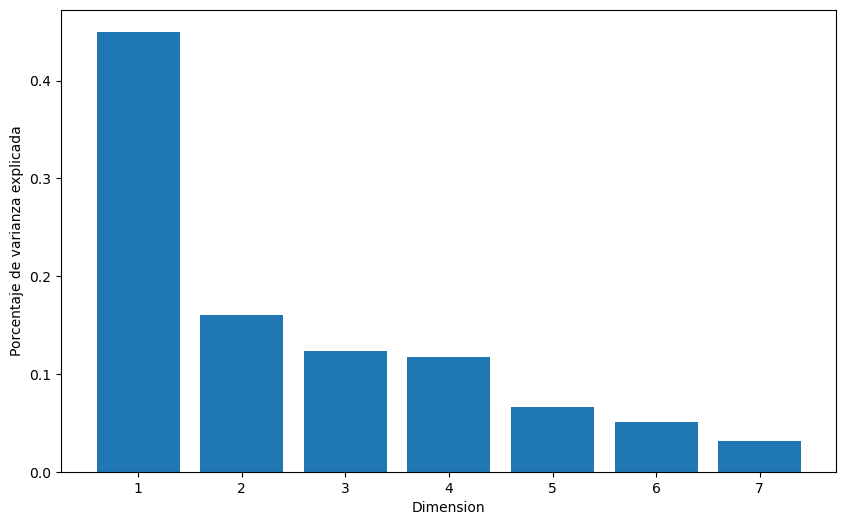

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.array([1,2,3,4,5,6,7]),pca.explained_variance_ratio_)
ax.set(xlabel = "Dimension",
       ylabel = "Porcentaje de varianza explicada")

plt.show()


También podemos hacer una visualización de las variables originales en las nuevas dimensiones. Primero revisemos las dos primeras componentes

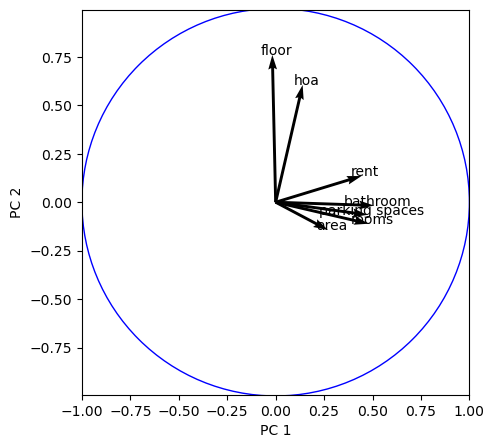

In [57]:
# Get the PCA components (loadings)
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.array(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa', 'rent'])

for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Done
plt.show()

La cercanía al circulo unitario es un indicativo de qué tan buena es ésta representación para cada variable

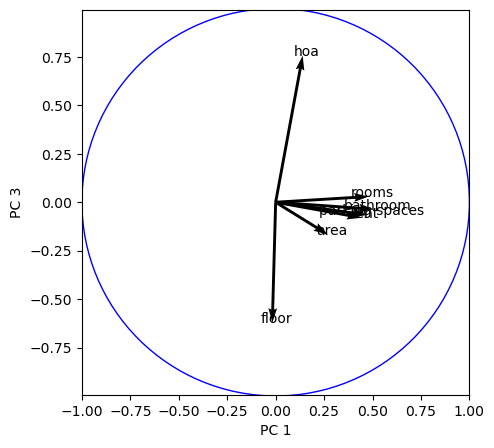

In [58]:
# Get the PCA components (loadings)
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[2,:], # primera y tercera dimension
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.array(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa', 'rent'])

for i,j,z in zip(PCs[2,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 3')

# Done
plt.show()

Podemos también visualizar los individuos en el mismo plano. Dado que tenemos 5887 observaciones la siguiente función puede tomar mucho tiempo para graficar los resultados. Por esta razón, sólo graficaremos las primeras 150 observaciones

In [60]:
df = principalDf.loc[:150]

/Users/alejandrocano/miniforge3/envs/mineria/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


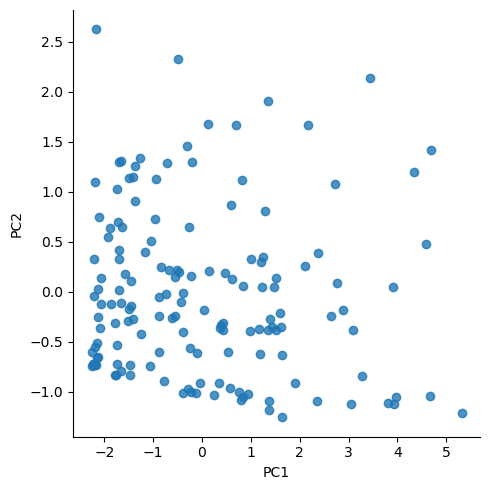

In [61]:
g = sns.lmplot('PC1',
               'PC2',
               data=df,
               fit_reg=False,
               scatter=True)
               #size=7)

plt.show()

### Ejercicios

**1. ¿Qué conclusiones podríamos sacar del biplot de la primer y segunda componente?**


**2. Ajustemos el mismo análisis para la ciudad de Rio de Janeiro, ¿qué resultados se obtienen? ¿hay diferencias con el análisis anterior?**

## Conclusiones

- El análisis de componentes principales resulta ser una gran herramienta para resumir información 

- Se pueden visualizar y encontrar patrones de forma multivariada

- Es posible identificar también información recurrente